In [1]:
from QuadrotorEnv import Quadrotor
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

env = Quadrotor()
state = env._reset()

# Feed-Back Gain
Kp = 0.1
Kd = 0.01

state_rec = []
action_rec = []
reward_rec = []

for i in range(5000):

    state_rec.append(state)
    '''
    # PID Controller Implementation
    
    uz = -Kp*(state[4]-1.)-Kd*state[5] + 9.81
    ux = -Kp*state[0] - Kd*state[1]
    uy = -Kp*state[2]-Kd*state[3]

    u1 = uz/(np.cos(state[6])*np.cos(state[7]))
    phiref = np.arctan(uy*np.cos(state[7])/(9.81-uz))

    thetaref = np.arctan(ux/(uz-9.81))

    u3 = 0.001*(thetaref-state[7])+0.0001*state[10]
    u2 = 0.001*(phiref-state[6])+0.0001*state[9]

    u = np.reshape([u1, u2, u3, 0.],(1,4))[0]
    '''
    u = env.action_space_sample()

    state, r = env.step(u)
    
    action_rec.append(u)
    reward_rec.append(r)

    env.render()


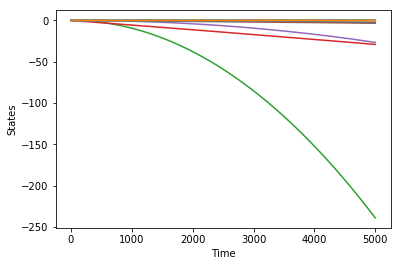

In [2]:
# Ploting 
state_rec = np.reshape(state_rec,(5000,12))
plt.plot(state_rec)
plt.ylabel('States')
plt.xlabel('Time')
plt.show()

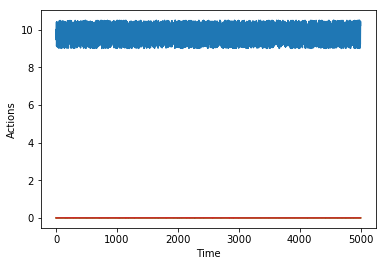

In [3]:
# Plotting Action
plt.plot(action_rec)
plt.ylabel('Actions')
plt.xlabel('Time')
plt.show()

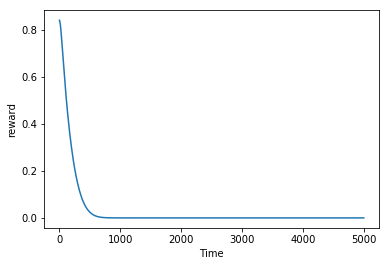

In [4]:
# Plotting reward
plt.plot(reward_rec)
plt.ylabel('reward')
plt.xlabel('Time')
plt.show()